In [1]:
import pickle
from itertools import chain

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300

In [2]:
with open("analysis/society-ipd.pickle", "rb") as f:
    data = pickle.load(f)

In [3]:
POPULATIONS = (16, 32, 64, 128, 256, 512)
LOOKBACKS = (1, 2, 3, 4, 5)

In [4]:
data["train_weights"].keys()

dict_keys([(16, 1, 0.1), (32, 1, 0.1), (64, 1, 0.1), (128, 1, 0.1), (256, 1, 0.1), (16, 2, 0.1), (32, 2, 0.1), (64, 2, 0.1), (128, 2, 0.1), (512, 1, 0.1), (256, 2, 0.1), (16, 3, 0.1), (32, 3, 0.1), (64, 3, 0.1), (128, 3, 0.1), (512, 2, 0.1), (256, 3, 0.1), (16, 4, 0.1), (32, 4, 0.1), (64, 4, 0.1), (128, 4, 0.1), (256, 4, 0.1), (512, 3, 0.1), (16, 5, 0.1), (32, 5, 0.1), (64, 5, 0.1), (128, 5, 0.1), (512, 4, 0.1), (256, 5, 0.1), (512, 5, 0.1)])

In [5]:
train_reward_df = pd.DataFrame(
    [
        [p, lb, r]
        for (p, lb, t), rewards in data["train_mean_reward"].items()
        for r in rewards
    ],
    columns=["population", "lookback", "reward"],
)

train_reward_df

population  lookback    reward
0            16         1  2.829153
1            16         1  2.742863
2            16         1  2.812103
3            16         1  2.818366
4            16         1  2.895728
..          ...       ...       ...
595         512         5  2.876859
596         512         5  2.881420
597         512         5  2.878260
598         512         5  2.880837
599         512         5  2.877367

[600 rows x 3 columns]

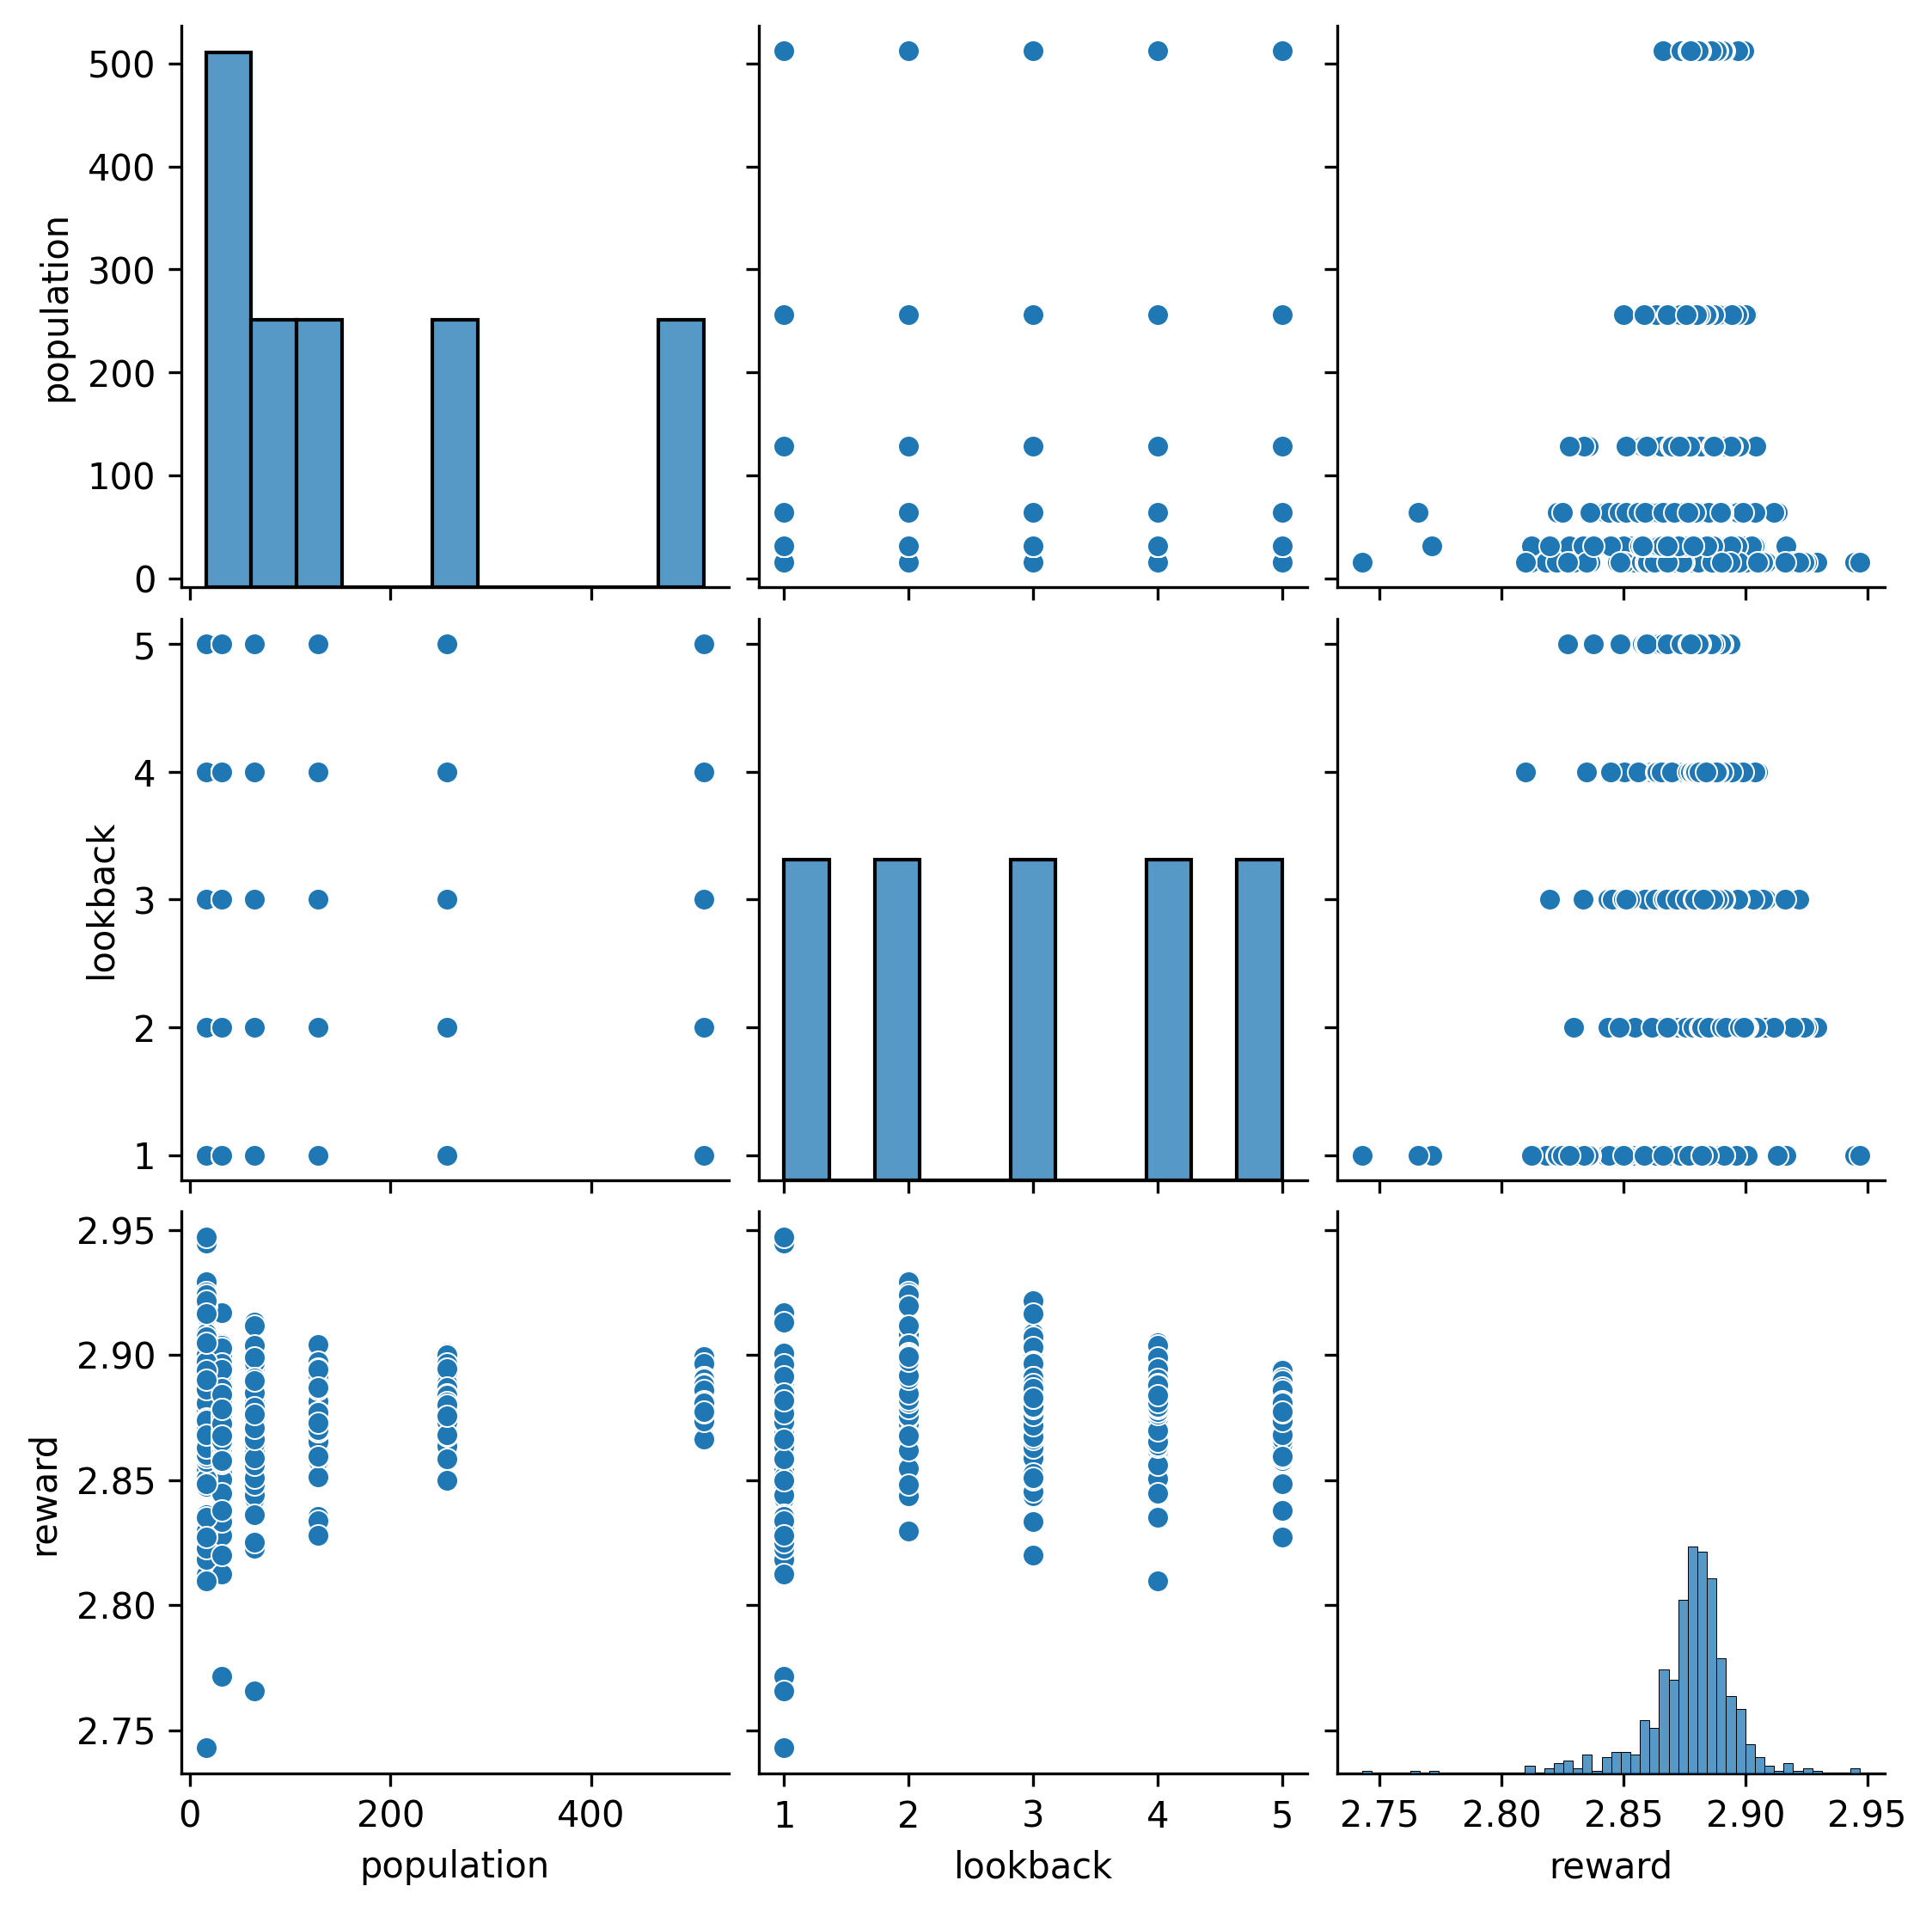

In [6]:
sns.pairplot(train_reward_df)

c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


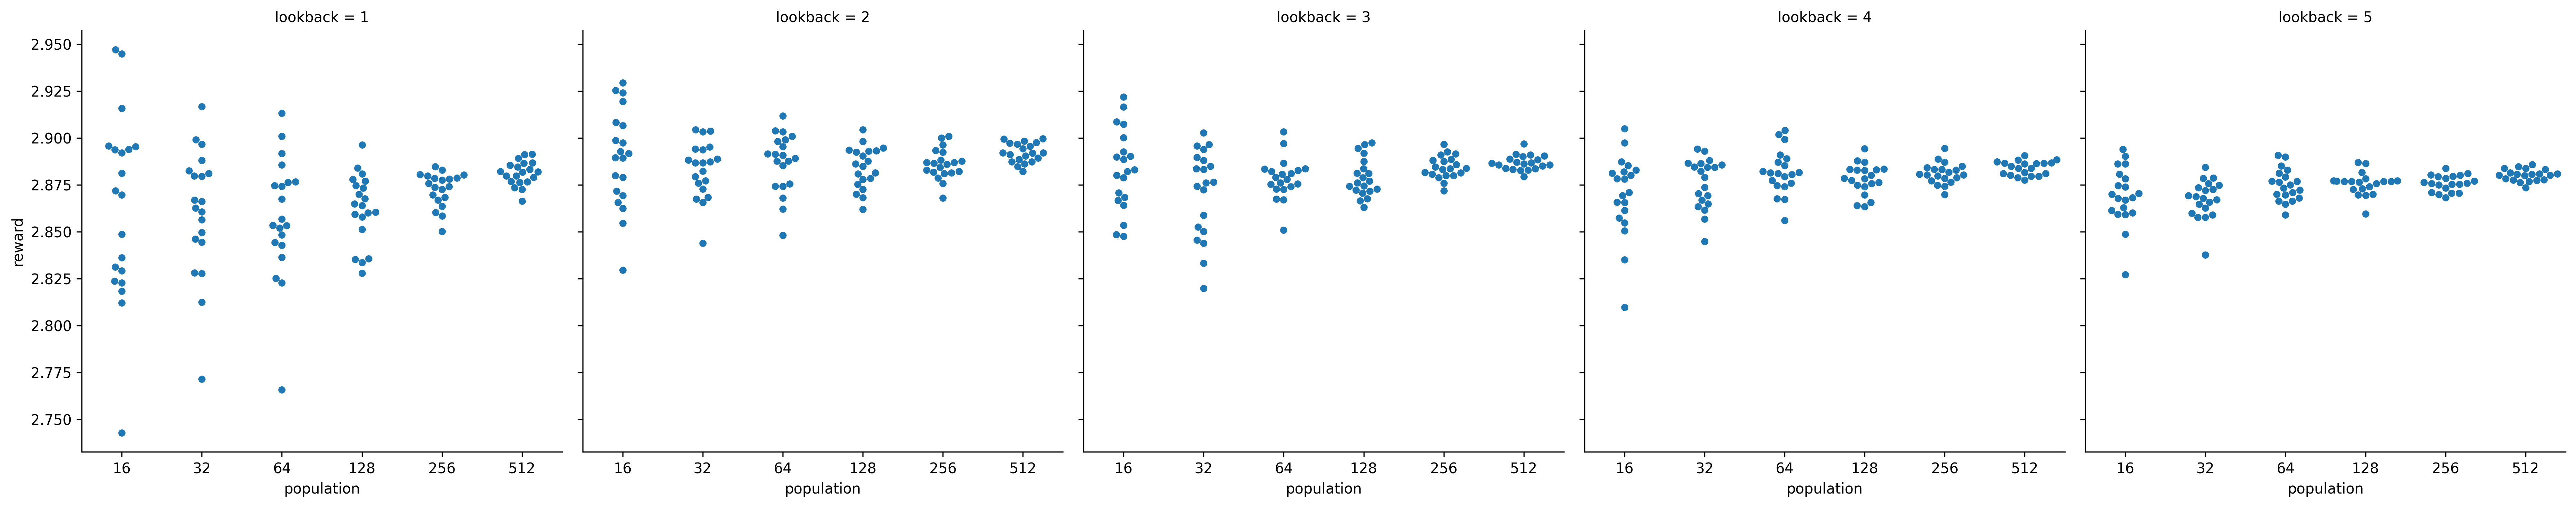

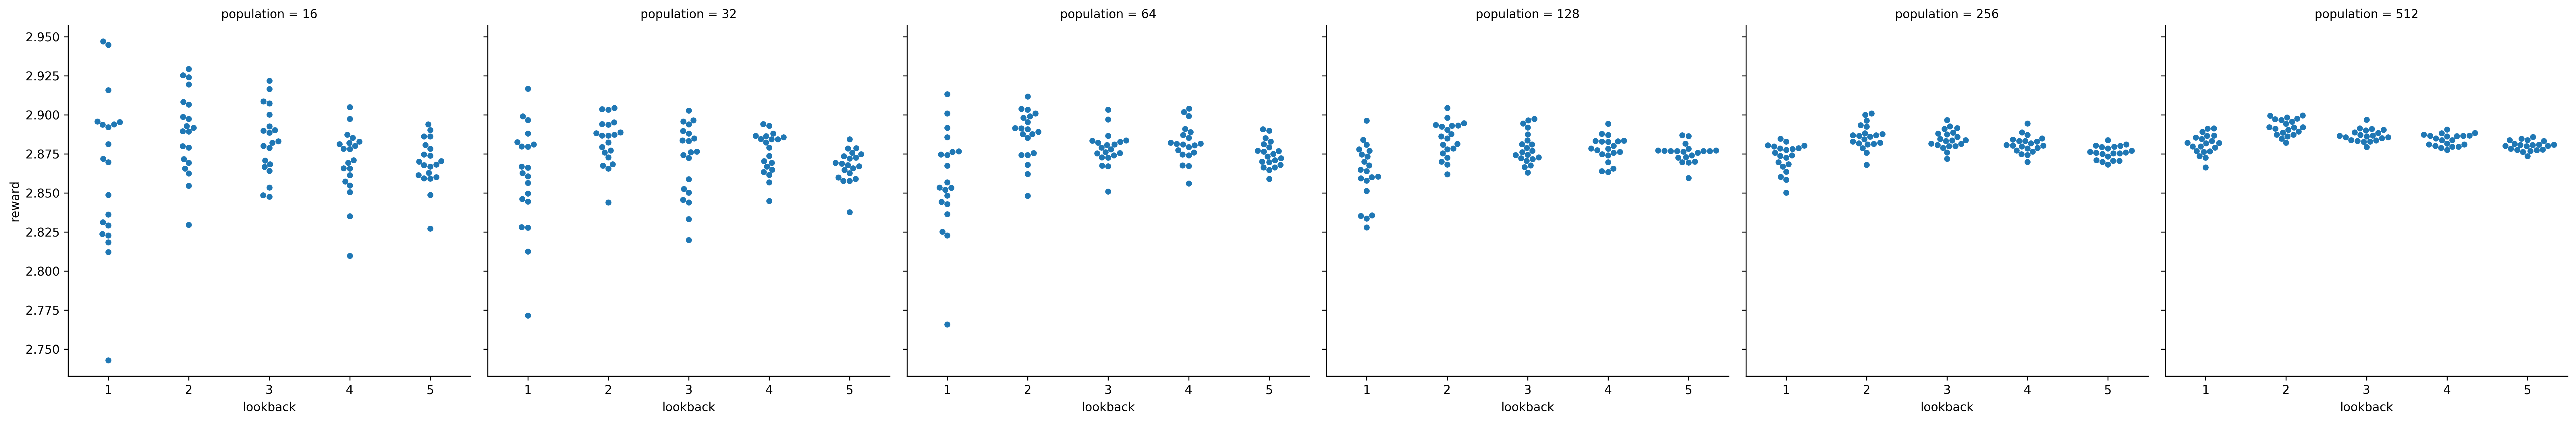

In [7]:
# sns.relplot(train_reward_df, x="population", y="reward", hue="lookback")

sns.catplot(
    data=train_reward_df, x="population", y="reward", col="lookback", kind="swarm"
)

sns.catplot(
    data=train_reward_df, x="lookback", y="reward", col="population", kind="swarm"
)

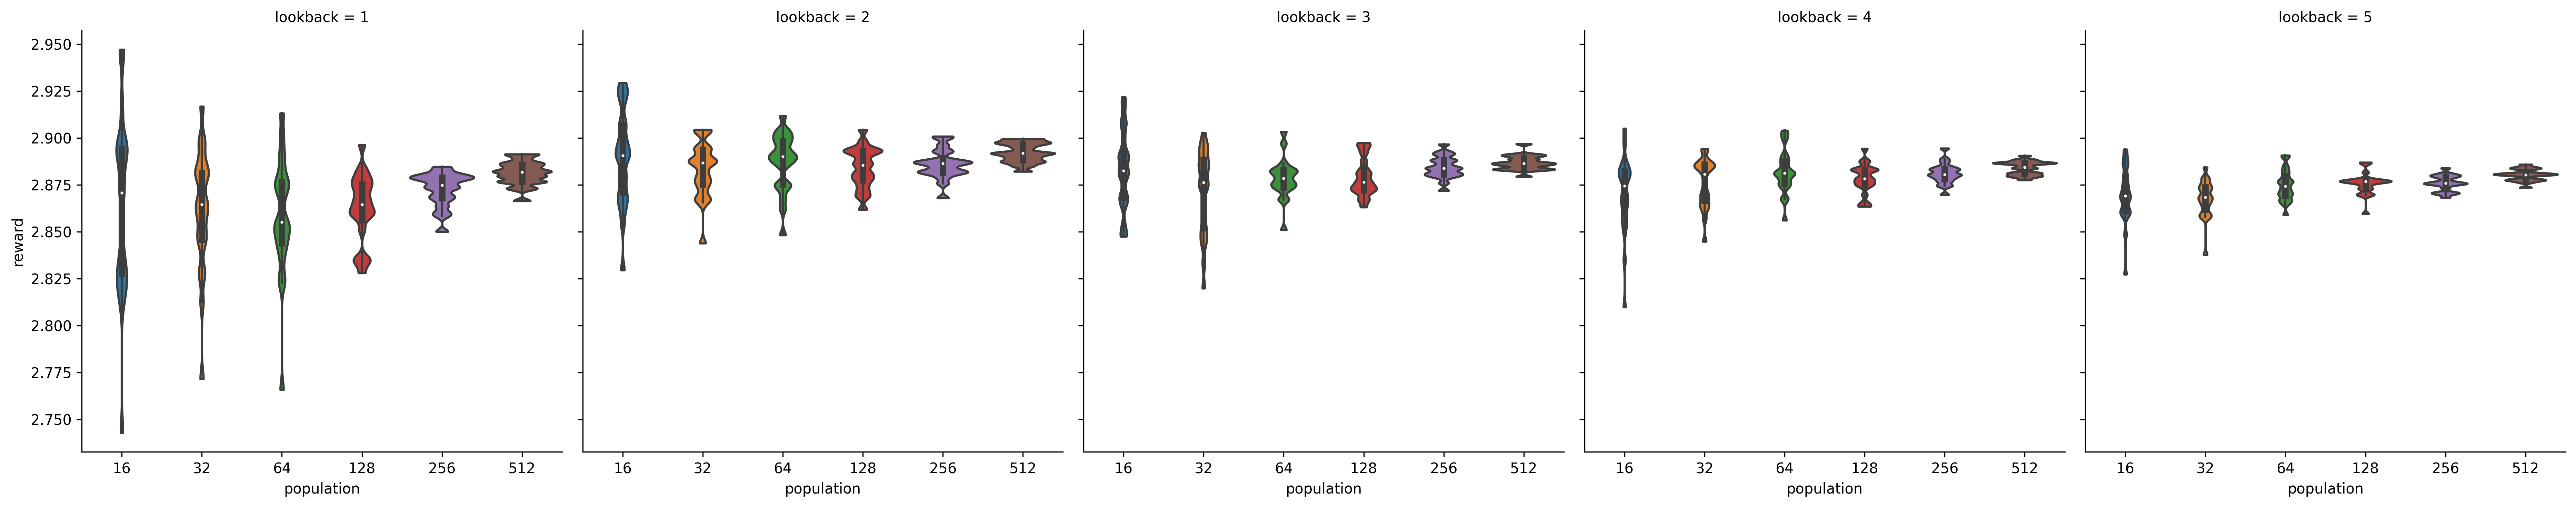

In [8]:
sns.catplot(
    data=train_reward_df,
    x="population",
    y="reward",
    col="lookback",
    kind="violin",
    bw=0.15,
    cut=0,
)

In [9]:
train_peak_df = pd.DataFrame(
    [
        [population, lb, i + 1, p]
        for (population, lb, t), peaks in data["train_peaks"].items()
        for peak in peaks
        for i, p in enumerate(peak)
    ],
    columns=["population", "lookback", "peak_index", "weight"],
)

train_peak_df

population  lookback  peak_index  weight
0             16         1           1   0.896
1             16         1           2   0.483
2             16         1           1   0.884
3             16         1           2   0.456
4             16         1           1   0.883
...          ...       ...         ...     ...
1367         512         5           2   0.050
1368         512         5           1   0.855
1369         512         5           2   0.050
1370         512         5           1   0.816
1371         512         5           2   0.050

[1372 rows x 4 columns]

In [37]:
peak_df = pd.DataFrame(
    [
        ["train", population, lb, i + 1, p]
        for (population, lb, t), peaks in data["train_peaks"].items()
        for peak in peaks
        for i, p in enumerate(peak)
    ]
    + [
        ["test", population, lb, i + 1, p]
        for (population, lb, t), peaks in data["test_peaks"].items()
        for peak in peaks
        for i, p in enumerate(peak)
    ],
    columns=["phase", "population", "lookback", "peak_index", "weight"],
)

peak_df

phase  population  lookback  peak_index  weight
0     train          16         1           1   0.896
1     train          16         1           2   0.483
2     train          16         1           1   0.884
3     train          16         1           2   0.456
4     train          16         1           1   0.883
...     ...         ...       ...         ...     ...
3323   test         512         5           4   0.667
3324   test         512         5           1   1.000
3325   test         512         5           2   0.819
3326   test         512         5           3   0.050
3327   test         512         5           4   0.672

[3328 rows x 5 columns]

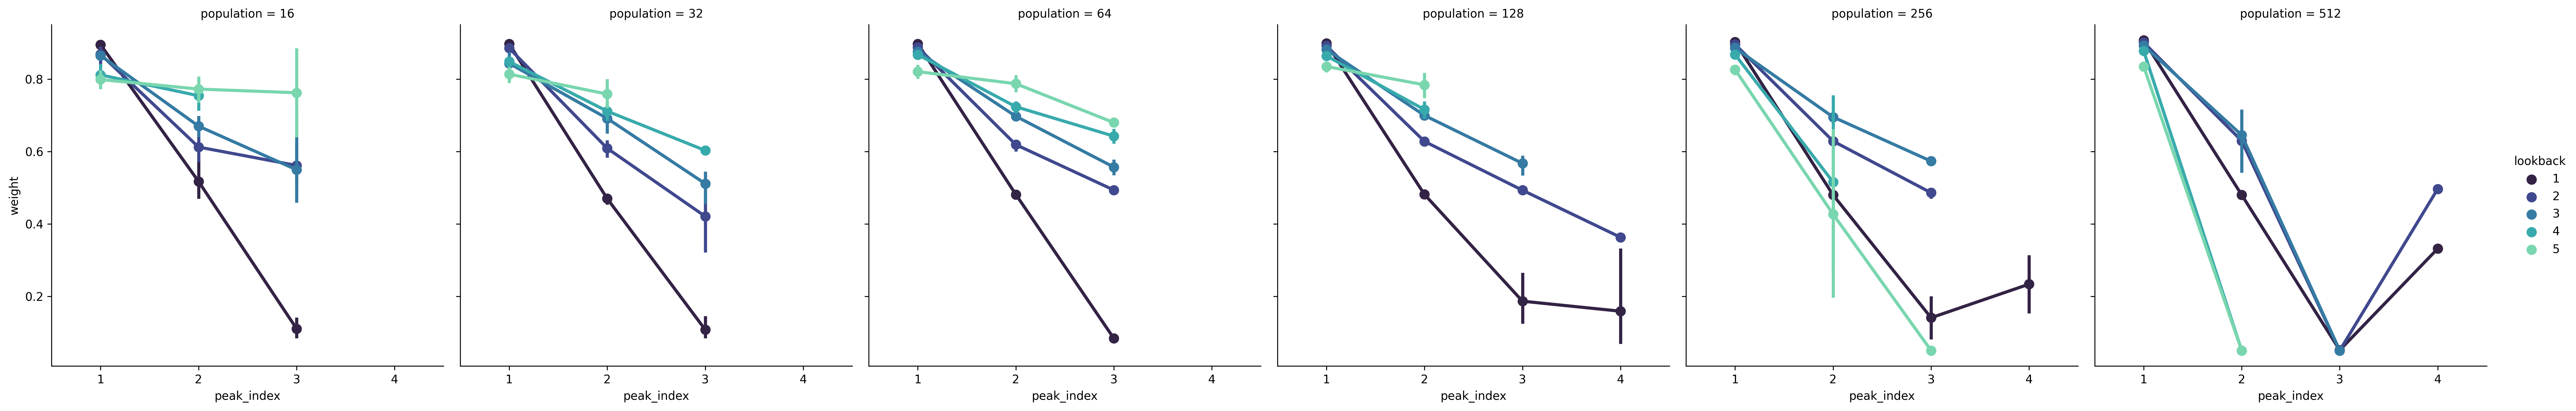

In [10]:
sns.catplot(
    data=train_peak_df,
    x="peak_index",
    y="weight",
    col="population",
    hue="lookback",
    palette="mako",
    # kind="violin", bw=.15, cut=0,
    # kind="swarm"
    kind="point",
)

In [12]:
sns.catplot(
    data=train_peak_df,
    x="peak_index",
    y="weight",
    col="population",
    row="lookback",
    palette="mako",
    # kind="violin", bw=.15, cut=0,
    kind="swarm"
    # kind="point"
)

C:\Users\jerem\AppData\Local\Temp/ipykernel_22316/2564025509.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 15.8% of the points cannot be placed; you may want to

c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


In [21]:
sns.catplot(
    data=train_peak_df,
    x="peak_index",
    y="weight",
    col="lookback",
    row="population",
    palette="mako",
    # kind="violin", bw=.15, cut=0,
    # kind="swarm"
    kind="point",
)

(0.0, 1.0)

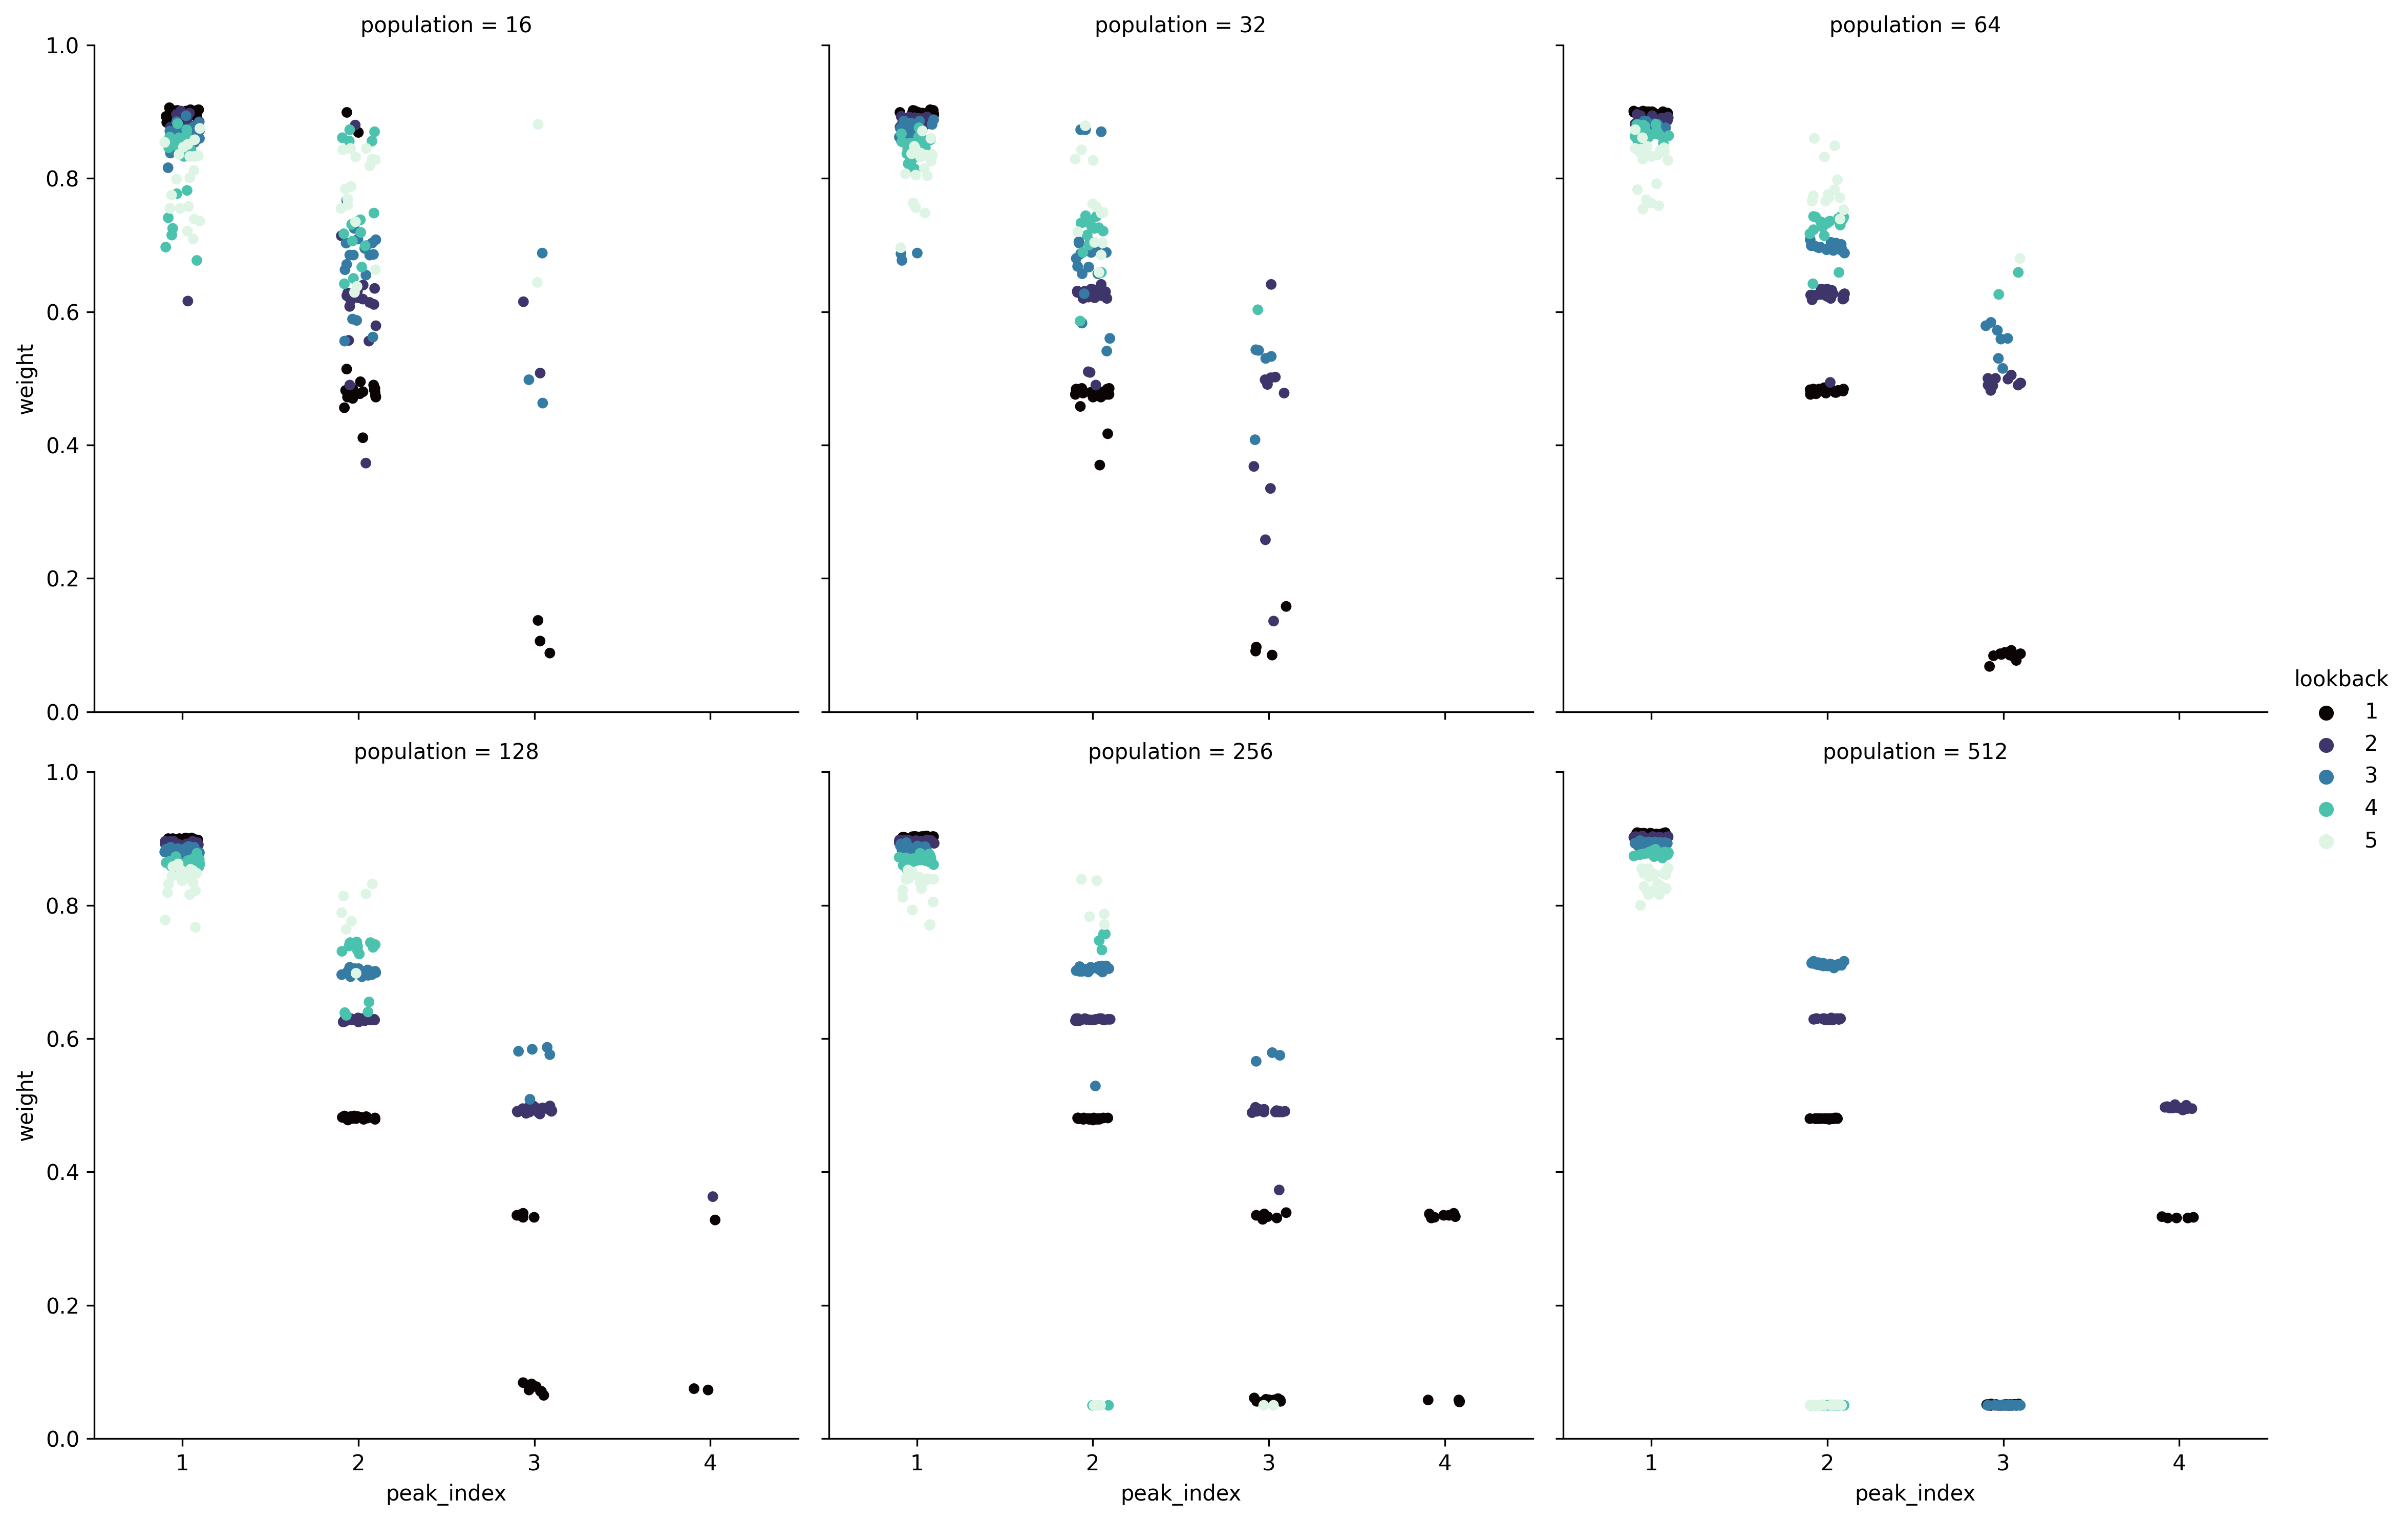

In [28]:
sns.catplot(
    data=train_peak_df,
    x="peak_index",
    y="weight",
    hue="lookback",
    col="population",
    palette="mako",
    col_wrap=3,
    # kind="violin", bw=.15, cut=0,
    # kind="swarm"
    # kind="point"
)

plt.ylim(0.0, 1.0)

c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categori

(0.0, 1.0)

c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categorical.py:3543: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\jerem\miniconda3\envs\ml\lib\site-packages\seaborn\categori

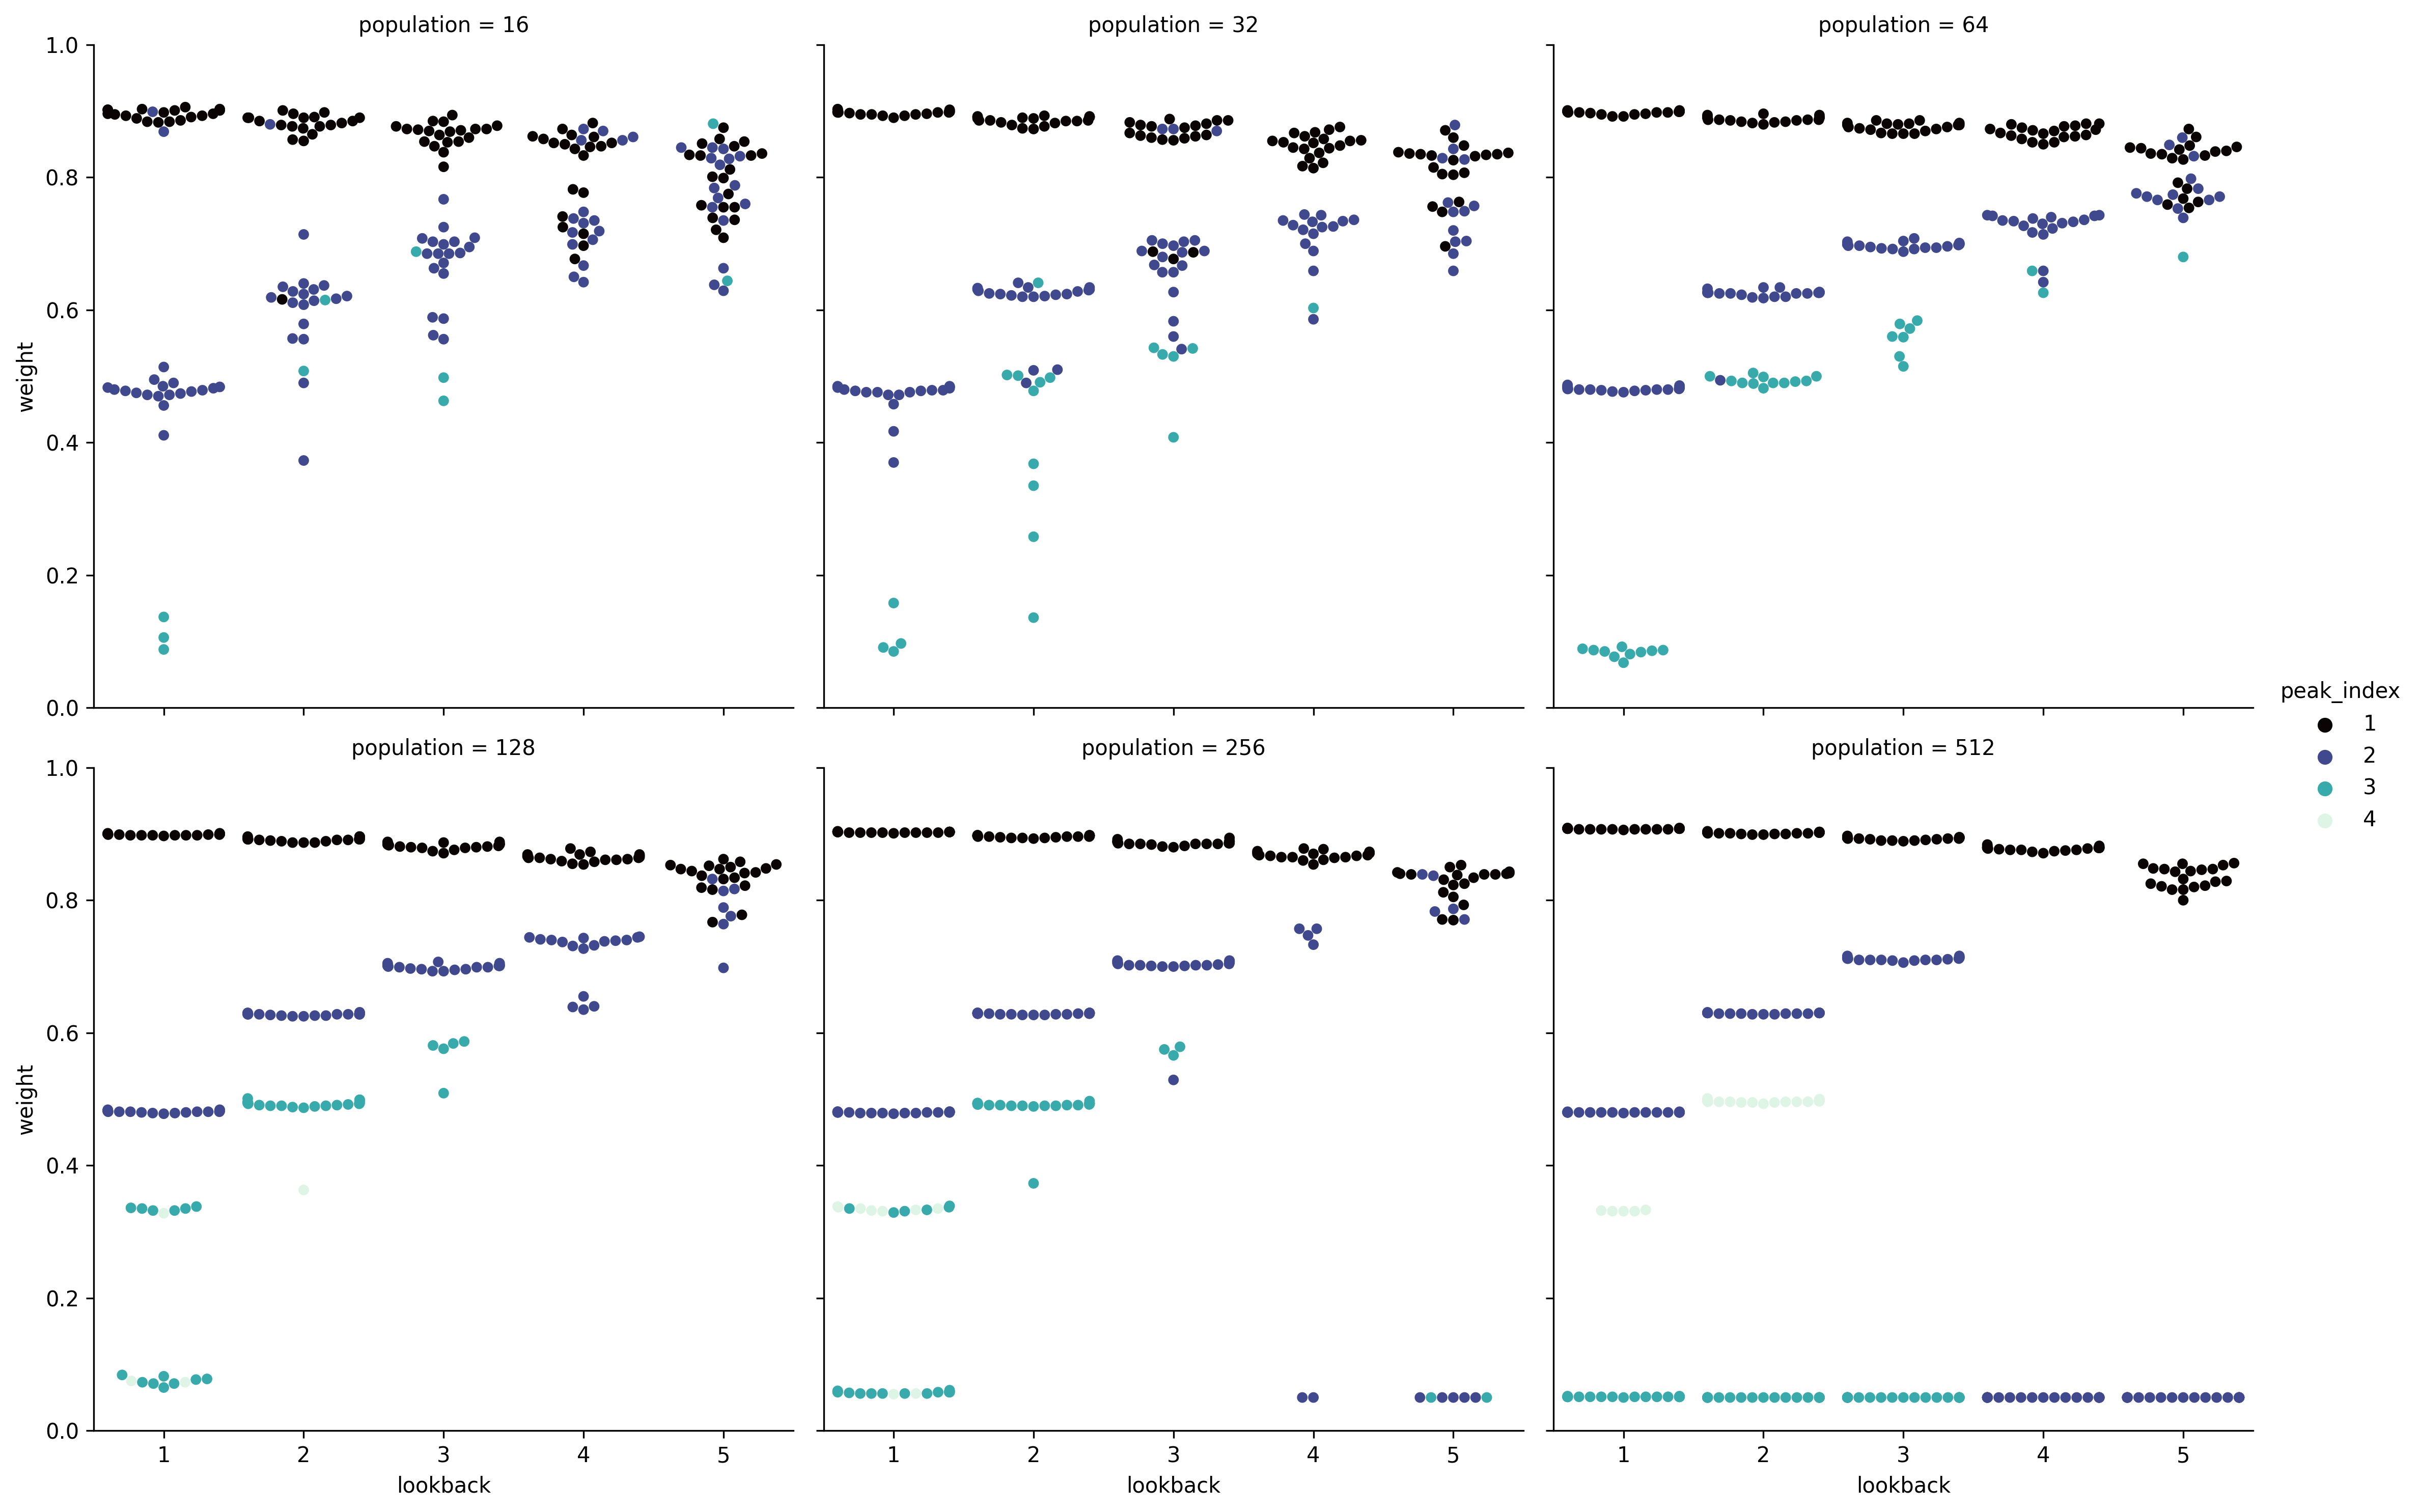

In [35]:
sns.catplot(
    data=train_peak_df,
    x="lookback",
    y="weight",
    hue="peak_index",
    col="population",
    palette="mako",
    col_wrap=3,
    # kind="violin", bw=.15, cut=0,
    kind="swarm"
    # kind="point"
)

plt.ylim(0.0, 1.0)

(0.0, 1.0)

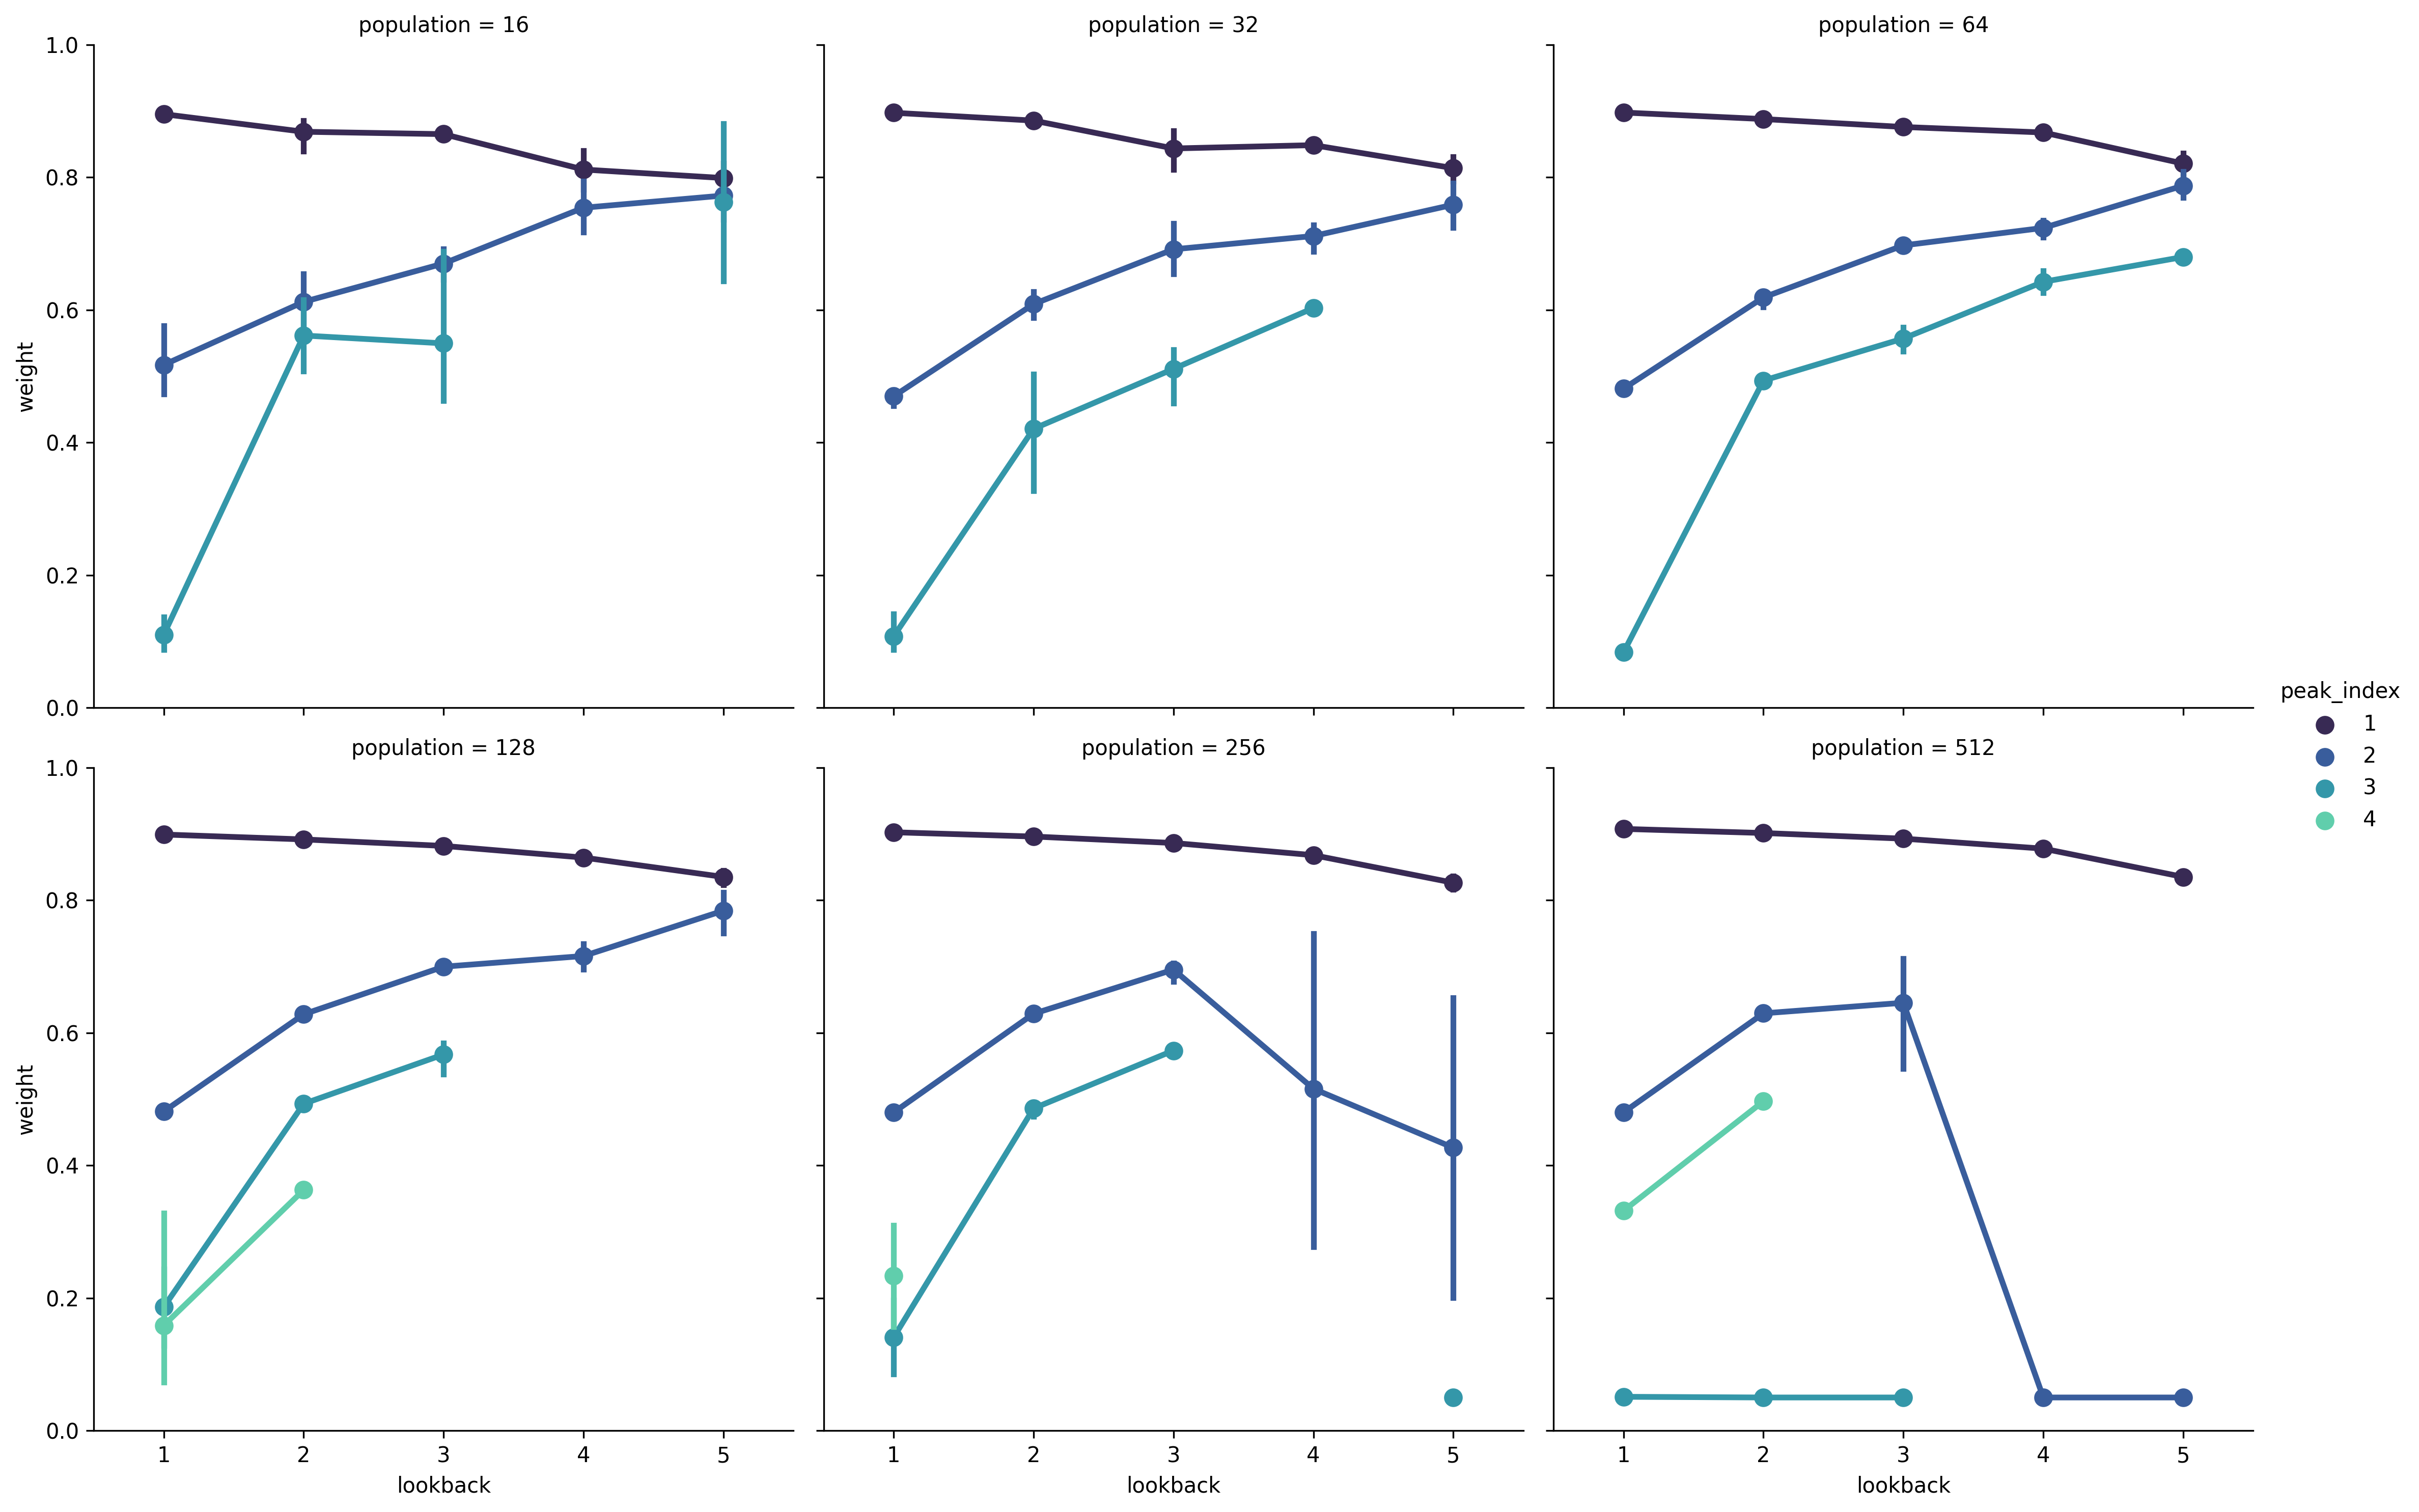

In [36]:
sns.catplot(
    data=train_peak_df,
    x="lookback",
    y="weight",
    hue="peak_index",
    col="population",
    palette="mako",
    col_wrap=3,
    # kind="violin", bw=.15, cut=0,
    # kind="swarm"
    kind="point",
)

plt.ylim(0.0, 1.0)

(0.0, 1.0)

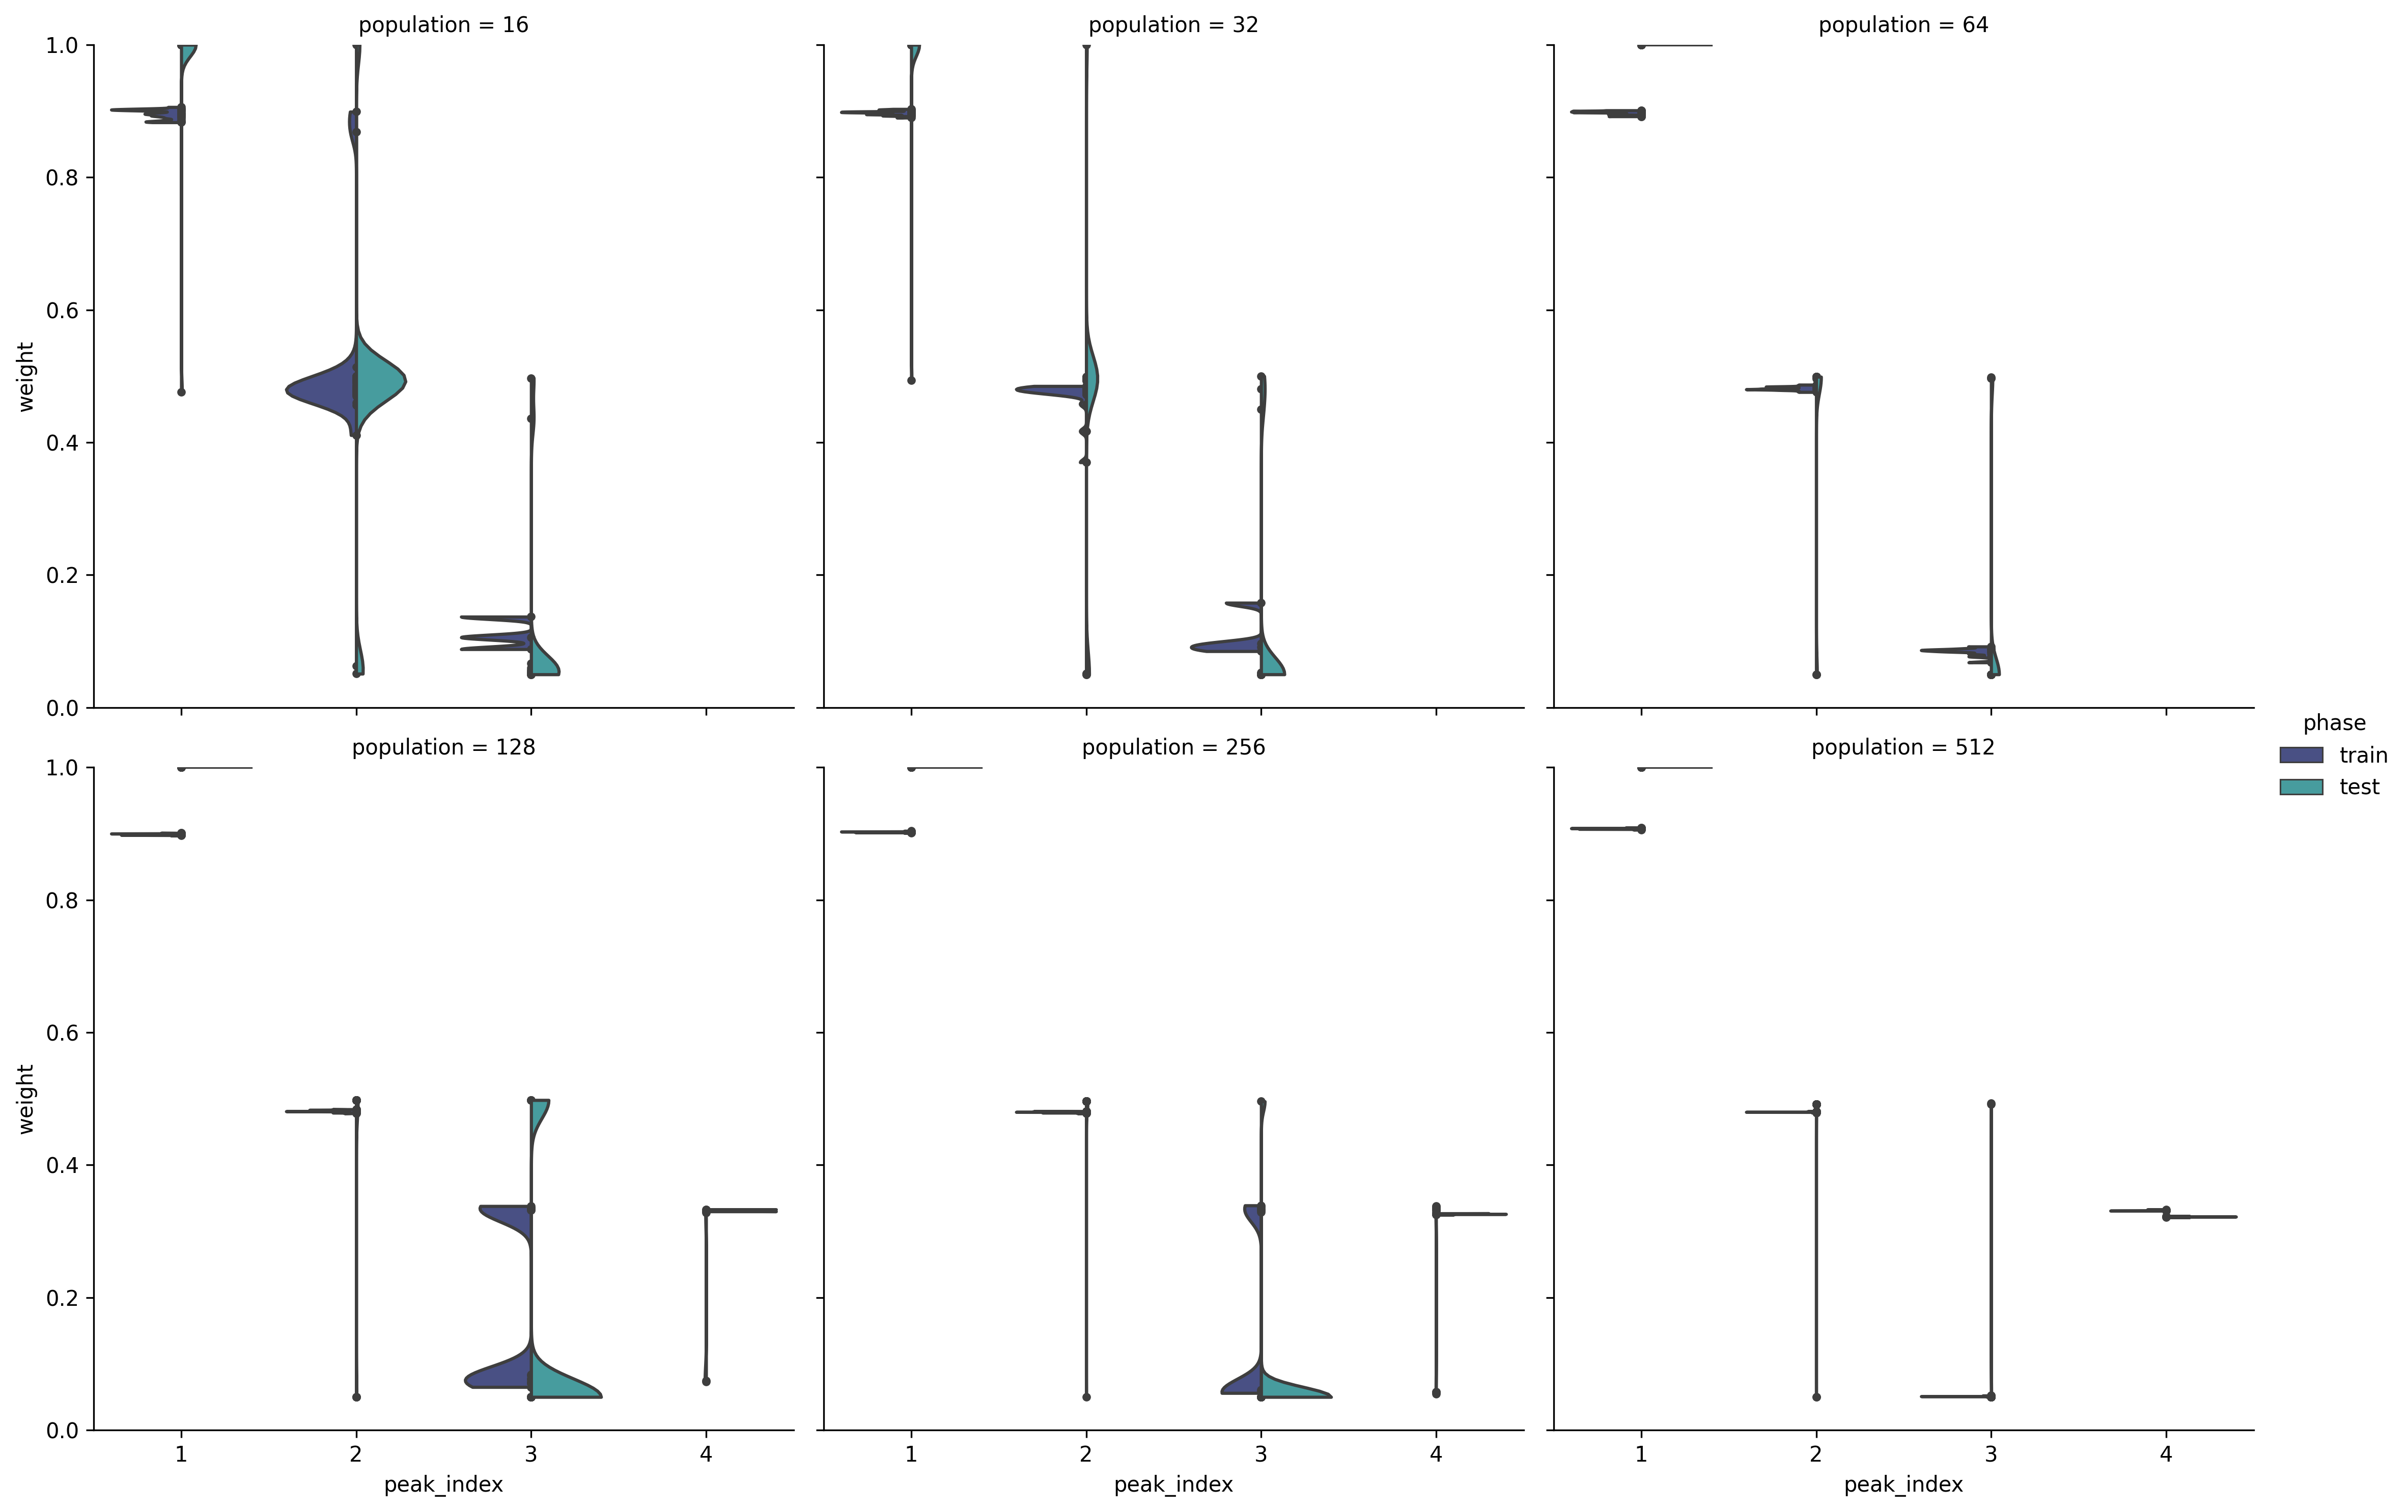

In [44]:
sns.catplot(
    data=peak_df[peak_df["lookback"] == 1],
    x="peak_index",
    y="weight",
    hue="phase",
    col="population",
    palette="mako",
    col_wrap=3,
    kind="violin",
    bw=0.15,
    cut=0,
    split=True,
    inner="point",
    # kind="swarm"
    # kind="point"
)

plt.ylim(0.0, 1.0)